In [412]:
import numpy as np 
import matplotlib.pyplot as plt


# The objective here  is to write a backpropagation algorithm from scratch, not to build a neural network 

Let's start out by writing a dummy neural network which is basically equivalent to:

```
def fake_nn(input):
    x,y,z = input * np.array([1,2,3])
    return np.array((x+y)*z)
```


### Building a `dummy_neural_net`

This is based on the typical models you'd see for a pytorch neural net, except that I added a function that would help obtain the gradients with respect to the loss 

In [564]:
class dummy_neural_net(object):
    def __init__(self, weights):
        self.weights = np.array(weights)
        self.info = "I am not a neural network"

    def forward(self, input):

        x,y,z = input * self.weights
        return np.array((x+y)*z)

    def gradients(self, dloss, dweights):

        ## remember chain rule ? 
        dx, dy, dz = dweights
        dz_by_dloss = dz/dloss
        dx_by_dloss = (dx/dz) * dz_by_dloss
        dy_by_dloss = (dy/dz) * dz_by_dloss

        return np.array([dx_by_dloss, dy_by_dloss, dz_by_dloss])
        

## Mapping 1.5 to 36 with our model in a training loop

This is quite possibly the simplest task I could think of for a neural net

In [565]:
model = dummy_neural_net(weights = np.array([1.,2.,3.]))

In [566]:
inp = 1.5
label = 36
step_size = 0.1

In [567]:
model.forward(1.5)

array(20.25)

## Manual backprop

* In the first iteration, the model takes a blind step in a random direction just to obtain a gradient. 
    * The gradient is the derivative of the weights with respect to the loss
* From the next iterations, this is what happens:

    * We save a copy of the model's current weights as `old_weights`
    * We do a forward pass with `model.forward()`
    * We then calculate the loss, the loss function itself is just the absolute difference 
    * Then we update the weights with `model.weights += - step_size * model.gradients(dloss, dweights)`
        * Notice how there's a minus sign before `step_size`, this is because the **gradient gives the direction of steepest ascent**, while **we want to go in the direction of the steepest descent** i.e `-(gradient)`
    * We make another forward pass, and calculate the new (and hopefully lower) loss 
    * Then we calculate the `dweights` and `dloss` which would help us calculate the gradients in the next iteratins
    * Finally we just append the loss into a list to show it  in an unnecessarily glorified plot. This point was completely useless, but thanks for reading this far. Have a great day and don't forget to drink water.

In [568]:
losses = []
for iters in range(180):

    old_weights = model.weights.copy()

    pred = model.forward(inp)

    loss = np.abs(label - pred)

    if iters == 0:
        model.weights += np.random.rand(3)/10  ## initial blind step
    else:
        model.weights += - step_size * model.gradients(dloss, dweights)

    new_pred = model.forward(inp)

    new_loss = np.abs(label - new_pred) 
    
    new_weights = model.weights.copy()

    dweights = np.absolute(old_weights - new_weights)
    dloss = new_loss - loss 

    losses.append(new_loss)


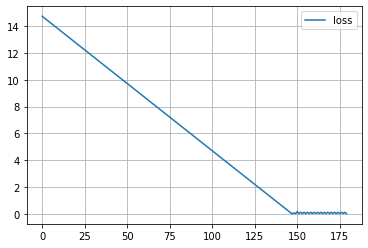

In [571]:
plt.plot(losses, label = "loss")
plt.grid()
plt.legend()
plt.show()

## After some training, we finally were able to map 1.5 to 36 with our caveman backprop

In [570]:
model.forward(1.5)

array(36.03307222)